# Notebook Imports and Packages

In [93]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # colour map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [41]:
def f(x):
    return x**2 + x + 1

In [42]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

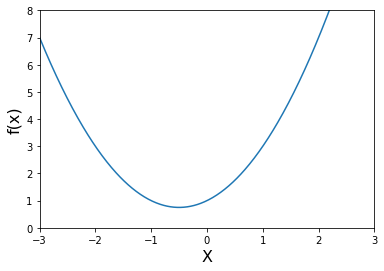

In [43]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives
Challenge: Create a Python function for the derivative of $f(x)$ called $df(x)$

In [44]:
def df(x):
    return 2*x + 1

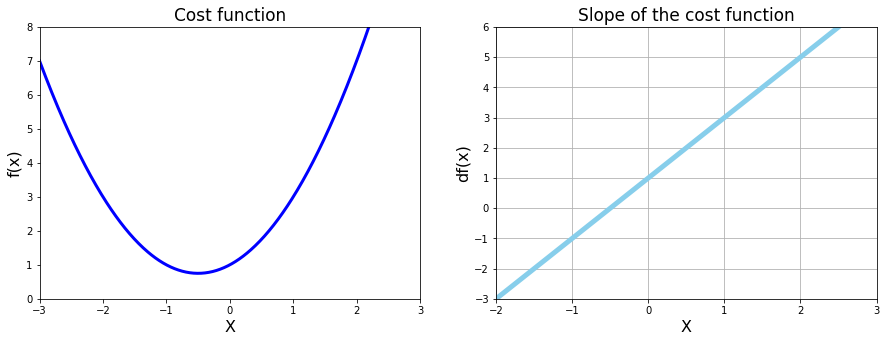

In [45]:
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Python Loops & Gradient Descent

In [46]:
# Python For Loop
for n in range(5):
    print('Hello World', n)
print('End of loop')

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of loop


In [47]:
# Python while loop
counter = 0
while counter < 7:
    print('Counting ...', counter)
    counter = counter + 1
print('Ready or not, here I come!')

Counting ... 0
Counting ... 1
Counting ... 2
Counting ... 3
Counting ... 4
Counting ... 5
Counting ... 6
Ready or not, here I come!


In [48]:
# Gradient Descent
new_x = -3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or d(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 49
Local minimum occurs at: -0.5000356811923176
Slope or d(x) value at this point is: -7.136238463512079e-05
f(x) value or cost at this point is: 0.7500000012731475


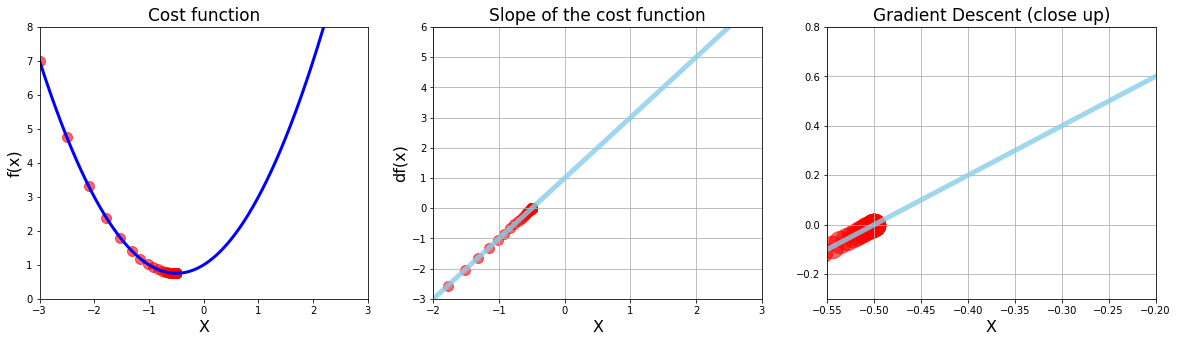

In [49]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)
plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=500, alpha=0.6)


plt.show()

## Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

$$ g(x) = x^4 - 4x^2 + 5 $$

In [50]:
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x




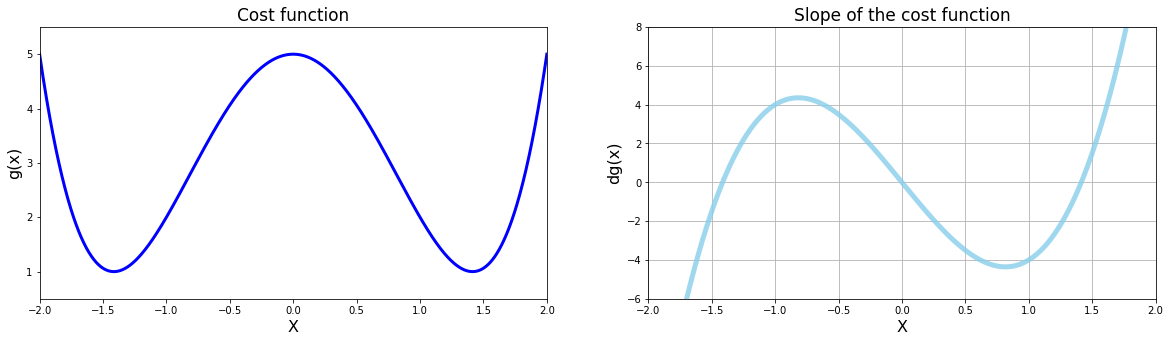

In [51]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)

values = np.array(x_list)
# plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.8)
# plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)



plt.show()

## Gradient Descent as a Python Function

In [52]:
# Gradient Descent
    
def gradient_descent(derivative_func, initial_guess, multiplier=0.02,
                     precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break

    return new_x, x_list, slope_list

In [53]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)

print('Local min occurs at:', local_min)
print('Number of step:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of step: 23


In [54]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5,
                                                 multiplier=0.01, precision=0.0001)

print('Local min occurs at:', local_min)
print('Number of step:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of step: 56


In [55]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('Local min occurs at:', local_min)
print('Number of step:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of step: 34


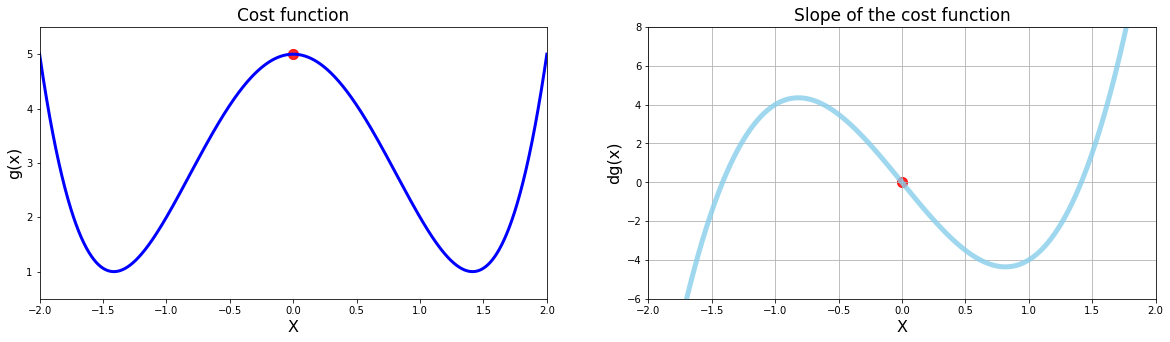

In [56]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.0)

# Plot function and derivative and scatter plot side by side.

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)

plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.8)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples
## $$ h(x) = x^5 - 2x^4 + 2 $$

In [57]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3



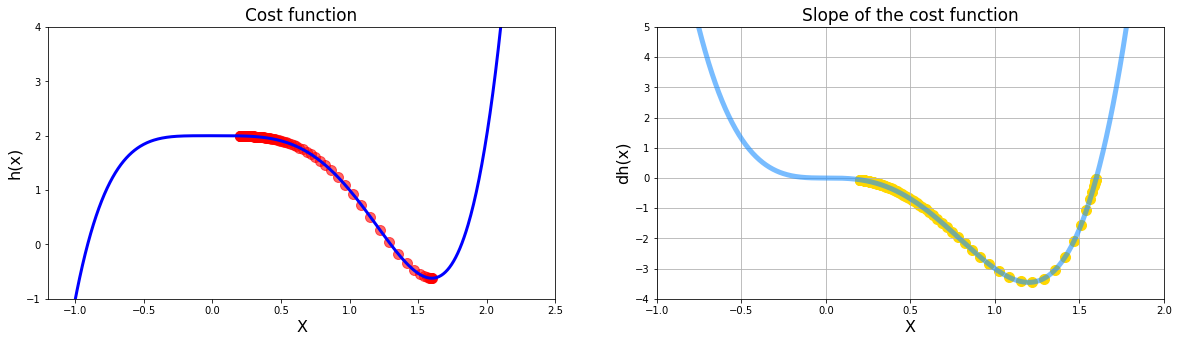

Local min occurs at: 1.5989534547394717
Cost at this minimum is:  -0.6214287992331258
Number of steps:  117


In [58]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=0.2) #, max_iter=70)

# Plot function and derivative and scatter plot side by side.

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.plot(x_3, h(x_3), color='blue', linewidth=3)

plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='dodgerblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='gold', s=100) # , alpha=0.5)

plt.show()

print('Local min occurs at:', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

# 380,000,000,000,000,000,000,000,000,000
import sys
# help(sys)
sys.version
sys.float_info.max

## Python Tuples

In [59]:
# Creating a tuple - tuple packing
breakfast = 'bacon', 'egss', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

print('I looove ', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[0]) + 'th floor')

I looove  bacon
My hotel has no 13th floor


## The Learning Rate

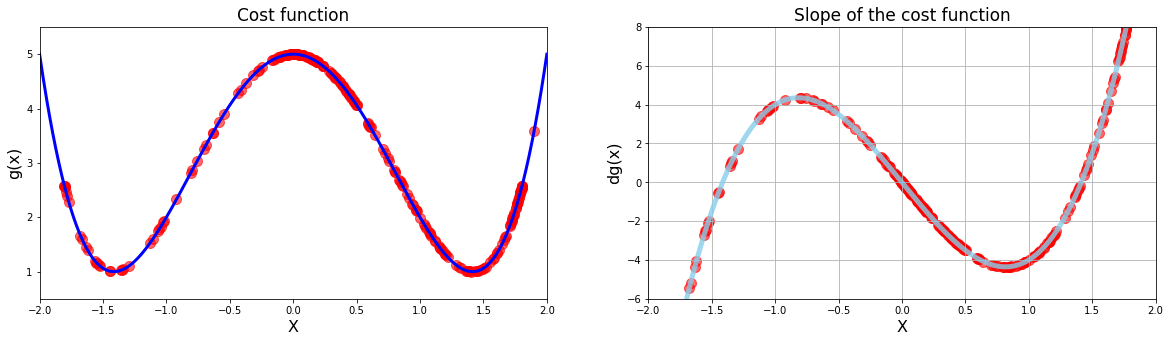

Number of steps is:  254


In [60]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                                multiplier=0.2, max_iter=500)

# Plot function and derivative and scatter plot side by side.

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)

plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.8)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)

plt.show()

print('Number of steps is: ', len(list_x))


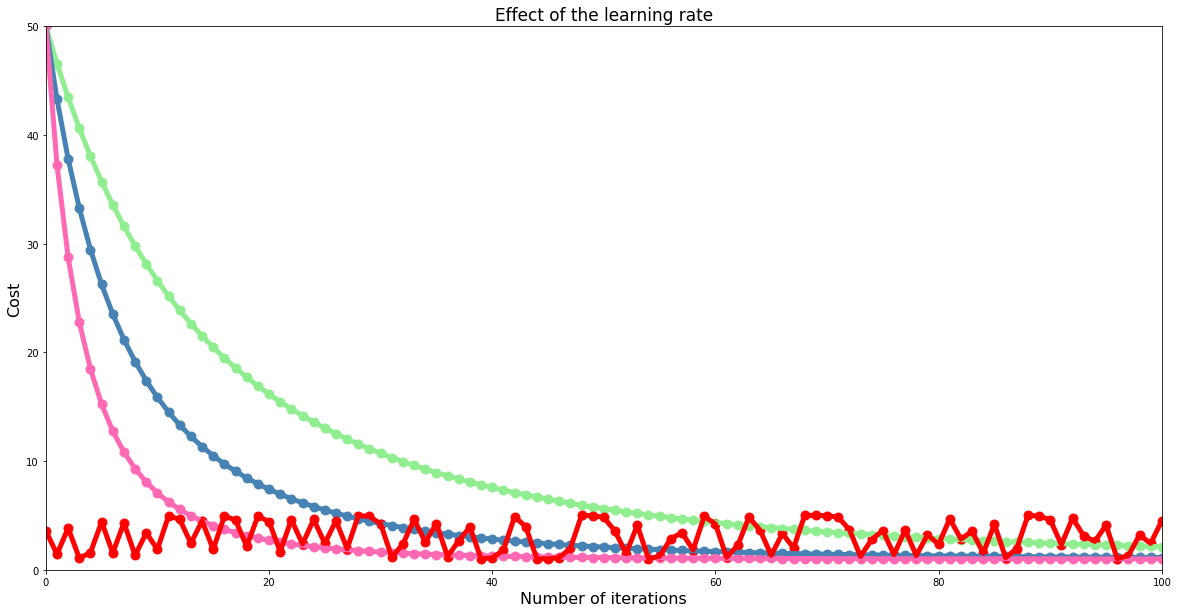

In [61]:
# Run gradient descent three times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                            multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                            multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                            multiplier=0.002, precision=0.0001, max_iter=n)
# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9,
                            multiplier=0.25, precision=0.0001, max_iter=n)

# Plotting reduction in cost for each iteration

plt.figure(figsize=[20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Number of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])

# 2) X Axis Data: creat a list from 0 to n+1
iteration_list = list(range(0, n+1))


# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

# Plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

# Plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)

plt.show()

# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [62]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [63]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

type(x_4)

print('Shape of X array', x_4.shape)
# This is a vector

x_4, y_4 = np.meshgrid(x_4, y_4)

print('Array after meshgrid:', x_4.shape)


Shape of X array (200,)
Array after meshgrid: (200, 200)


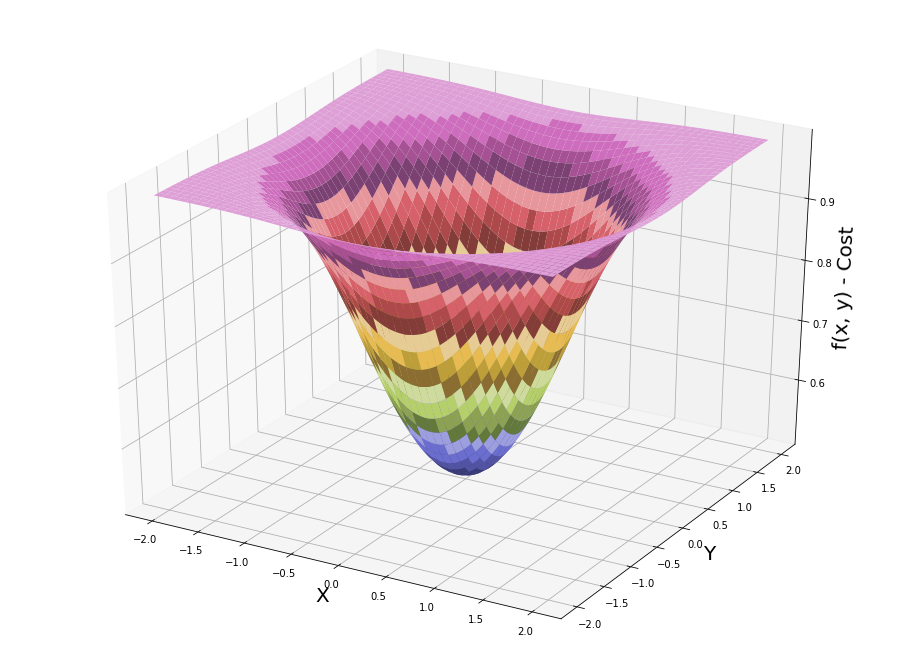

In [64]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)


ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.tab20b) #, alpha=0.5)

plt.show()

# $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{ \left(3^{-x^2 - y^2} + 1\right)^2}$$

## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{ \left(3^{-x^2 - y^2} + 1\right)^2}$$

In [65]:
a, b = symbols('x, y')

print('Our cost function f(x, y) is: ', f(a,b))
print('Partial derivative wrt x is: ', diff(f(a,b),a))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',
      f(a,b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
diff(f(a,b),a)
print('Value of Partial derivative wrt x at x=1.8 y=1.0 is: ',
      diff(f(a,b), a).evalf(subs={a:1.8, b:1.0})) # Python Dictionary

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582
Value of Partial derivative wrt x at x=1.8 y=1.0 is:  0.0368089716197505


## Batch Gradient Descent with SymPy

In [66]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


Values in gradient array  [0.000461440542096373 0.000256355856720208]
Minimum occurs at x value of:  0.000793898510134722
Minimum occurs at y value of:  0.000441054727852623
The cost is:  0.500000226534985


In [67]:
# Partial derivative functions example 4

def fpx(x,y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x,y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2


In [68]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


Values in gradient array  [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [69]:
# Setup
multiplier = 0.2
max_iter = 200
params = np.array([1.8, 1.0]) # Initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    # values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)
# Results
print('Values in gradient array ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


(1, 2)
Values in gradient array  [3.77919351e-09 2.09955195e-09]
Minimum occurs at x value of:  6.124101654908964e-09
Minimum occurs at y value of:  3.4022786971716457e-09
The cost is:  0.5


In [70]:
# Advanced Numpy Array Practice:
kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]', hs_band[0])
print('hs_band[0][1]', hs_band[0][1])
print('hs_band[1][0]', hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print('the_roots', the_roots)
print('the_roots.shape', the_roots.shape)

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)


print('Printing nicknames...', the_roots[:, 0])
print('Printing band roles...', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band[0] ['Black Thought' 'MC']
hs_band[0][1] MC
hs_band[1][0] Questlove
the_roots [['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
the_roots.shape (3, 2)
Printing nicknames... ['Black Thought' 'Questlove' 'Captain' 'Malik B']
Printing band roles... ['MC' 'Drums' 'Guitar' 'MC']


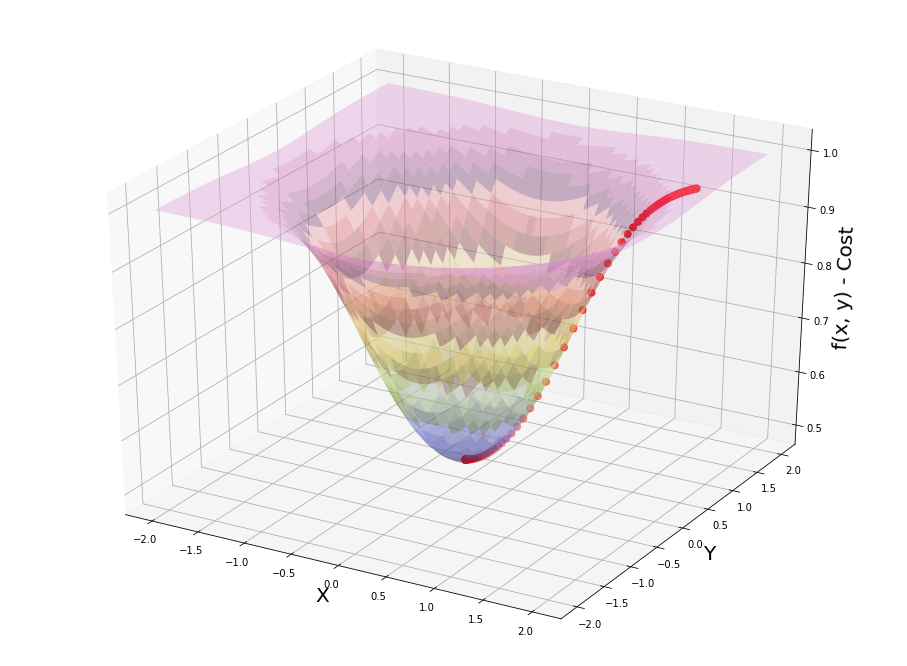

In [71]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)


ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.tab20b, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
          f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$ RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}\big)^2 $$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}\big)^2 $$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$


In [72]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.2, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)
print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)


Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [76]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8385888810198301
Theta 1: 1.2201664305949007


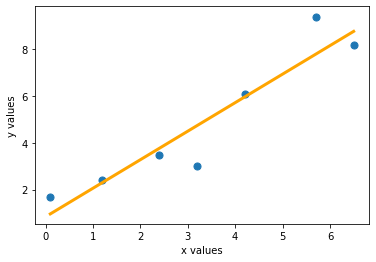

In [78]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [81]:
# y_hat = theta0 + theta1*x
y_hat = 0.8385888810198301 + 1.2201664305949007*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are: \n', y_5)

Est values y_hat are: 
 [[0.96060552]
 [2.3027886 ]
 [3.76698831]
 [4.74312146]
 [5.96328789]
 [7.79353754]
 [8.76967068]]
In comparison, the actual y values are: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [90]:
# Calculate the Mean Squared Error
def mse(y, y_hat):
    # mse = 1/7 * sum((y - y_hat)**2)
    # mse = (1/y.size) * sum((y - y_hat)**2)
    mse = np.average((y - y_hat)**2, axis=0)
    return mse

In [95]:
print('Manually calculated MSE is: ', mse(y_5, y_hat))
print('MSE regression using manual calc is ', mean_squared_error(y_5, y_hat))
print('MSE regression is ', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is:  [0.94140657]
MSE regression using manual calc is  0.9414065661675438
MSE regression is  0.9414065661675438
